# Star Wars Fans survey analysis

In this project we will clean and analyze data from survey conducted by FiveThirtyEight. This survey was made for Star War fans and supposed to answer the question "does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"

In [80]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [81]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

RespondentID sometimes is Nan which is wrong. 1st row of the dataset has many weird answers.

In [82]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Remove of all RespondentID which is NaN

In [83]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

Converting some questions to boolean answers to make it easier to explore the data

In [84]:
cols_to_bool = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
]

yes_no = {
    "Yes": True,
    "No": False
}

for c in cols_to_bool:
    star_wars[c] = star_wars[c].map(yes_no)

Lets convert to boolean the multipler checbox question "Which of the following Star Wars films have you seen? Please select all that apply." as well rename colons to reflect answers better. 

In [85]:
import numpy as np

cols_to_bool = star_wars.columns[3:9]

episodes_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}


for c in cols_to_bool:
    star_wars[c] = star_wars[c].map(episodes_map)

In [86]:
star_wars[cols_to_bool].head()
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
})

In [87]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Lets take the next question about rating for episodes (answers in columns 9-14) and convert data to float and rename columns.

In [88]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [89]:
cols_map = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

star_wars.rename(columns=cols_map,inplace=True)

star_wars.columns

## Ranking exploration

Lets see which episod is higher ranked

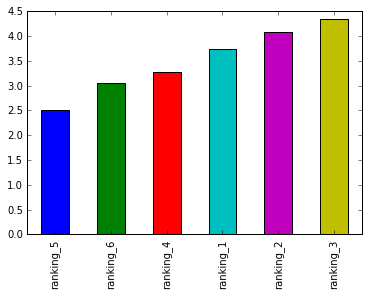

In [90]:
%matplotlib inline

episode_rank = star_wars[star_wars.columns[9:15]].mean().sort_values()
episode_rank.plot(kind='bar')

Respondents ranked Star Wars: Episode V The Empire Strikes Back as the best episode of Star Wars.

Lets explore how many episodes respondents saw:

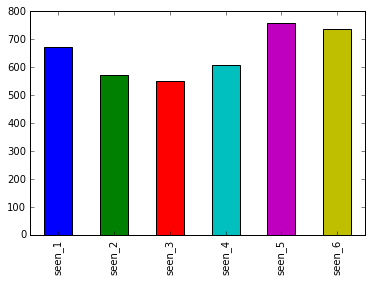

In [91]:
episode_seen = star_wars[star_wars.columns[3:9]].sum()
episode_seen.plot(kind='bar')

It is clearly that episode 5 is the most seen which can partially explain why it has highest ranking. There seems to be a week correlation 

Lets see the correlation between ranking and seen column:

In [92]:
episode_rank.corr(episode_seen)

nan

## Exploration of responders by segment

We can segment responders by do they concider them fans of SW or not

In [102]:
fan_col = "Do you consider yourself to be a fan of the Star Wars film franchise?"
sw_fan_yes = star_wars[star_wars[fan_col] == True]
sw_fan_no = star_wars[star_wars[fan_col] == False]

Lets explore fans


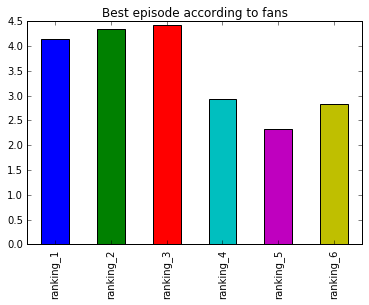

In [105]:
sw_fan_yes[star_wars.columns[9:15]].mean().plot(kind='bar',title='Best episode according to fans')

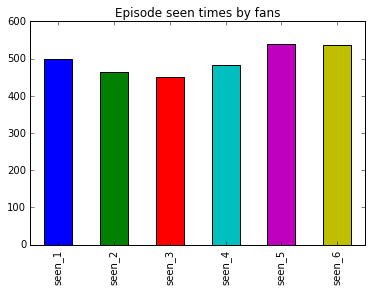

In [107]:
sw_fan_yes[star_wars.columns[3:9]].sum().plot(kind='bar',title='Episode seen times by fans')

Fans have the similar views as all respondents - best episode is 5. Seen episodes spreads similarly is statistic for all respondents

Lets explore not fans:

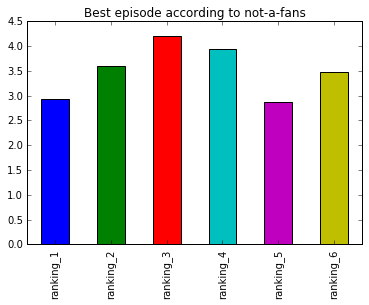

In [108]:
sw_fan_no[star_wars.columns[9:15]].mean().plot(kind='bar',title='Best episode according to not-a-fans')

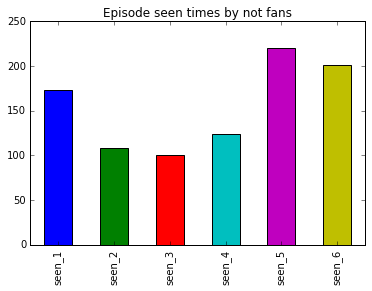

In [109]:
sw_fan_no[star_wars.columns[3:9]].sum().plot(kind='bar',title='Episode seen times by not fans')

Fans has more even distribution of episodes and most of them have seen all episodes. Not funs seen episode 5, 6 and 1 most.

# Next steps

Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
Which character do respondents like the most?
Which character do respondents dislike the most?
Which character is the most controversial (split between likes and dislikes)?